Parsed with column specification:
cols(
  id = col_integer(),
  identifier = col_character(),
  species_id = col_integer(),
  height = col_integer(),
  weight = col_integer(),
  base_experience = col_integer(),
  order = col_integer(),
  is_default = col_integer()
)
Parsed with column specification:
cols(
  id = col_integer(),
  damage_class_id = col_integer(),
  identifier = col_character(),
  is_battle_only = col_integer(),
  game_index = col_integer()
)
Parsed with column specification:
cols(
  pokemon_id = col_integer(),
  stat_id = col_integer(),
  base_stat = col_integer(),
  effort = col_integer()
)
Parsed with column specification:
cols(
  id = col_integer(),
  identifier = col_character(),
  generation_id = col_integer(),
  damage_class_id = col_integer()
)
Parsed with column specification:
cols(
  pokemon_id = col_integer(),
  type_id = col_integer(),
  slot = col_integer()
)
Parsed with column specification:
cols(
  id = col_integer(),
  identifier = col_character()
)
Parsed

id,pokemon,species_id,height,weight,base_experience,type_1,type_2,attack,defense,hp,special_attack,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_image
1,bulbasaur,1,7,69,64,grass,poison,49,49,45,65,65,45,#78C850,#A040A0,#81A763,monster,plant,1.png
2,ivysaur,2,10,130,142,grass,poison,62,63,60,80,80,60,#78C850,#A040A0,#81A763,monster,plant,2.png
3,venusaur,3,20,1000,236,grass,poison,82,83,80,100,100,80,#78C850,#A040A0,#81A763,monster,plant,3.png
4,charmander,4,6,85,62,fire,NA,52,43,39,60,50,65,#F08030,NA,#F08030,monster,dragon,4.png
5,charmeleon,5,11,190,142,fire,NA,64,58,58,80,65,80,#F08030,NA,#F08030,monster,dragon,5.png
6,charizard,6,17,905,240,fire,flying,84,78,78,109,85,100,#F08030,#A890F0,#DE835E,monster,dragon,6.png


Warning message:
“'list.parse3' is deprecated.
Use 'list_parse' instead.
See help("Deprecated")”

HTML widgets cannot be represented in plain text (need html)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”Warning message:
“'hc_add_series_treemap' is deprecated.
Use 'hctreemap' instead.
See help("Deprecated")”

HTML widgets cannot be represented in plain text (need html)

sigma summary: Min. : 0.5817 |1st Qu. : 0.8121 |Median : 0.8812 |Mean : 0.8667 |3rd Qu. : 0.9398 |Max. : 1.199 |
Epoch: Iteration #100 error is: 15.3178646262441
Epoch: Iteration #200 error is: 0.55901945013703
Epoch: Iteration #300 error is: 0.480759204077586
Epoch: Iteration #400 error is: 0.46058658789774
Epoch: Iteration #500 error is: 0.455580650283287
Epoch: Iteration #600 error is: 0.452174951447108
Epoch: Iteration #700 error is: 0.449347114319623
Epoch: Iteration #800 error is: 0.448721773406409
Epoch: Iteration #900 error is: 0.448359760924276
Epoch: Iteration #1000 error is: 0.448266455736193


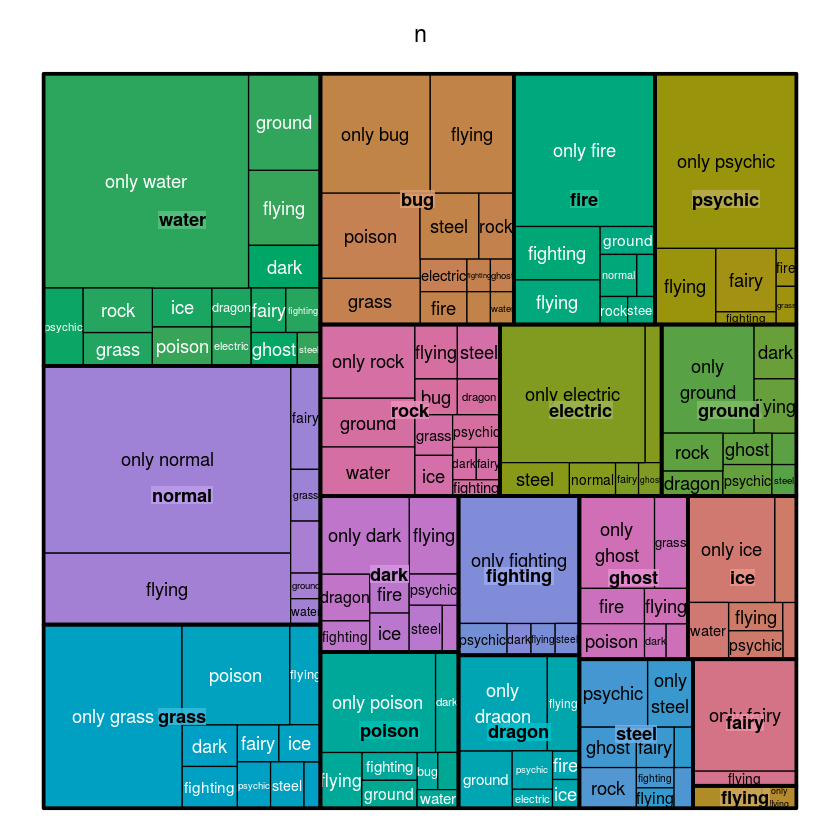

ERROR: Error in eval(expr, envir, enclos): object 'url_icon' not found


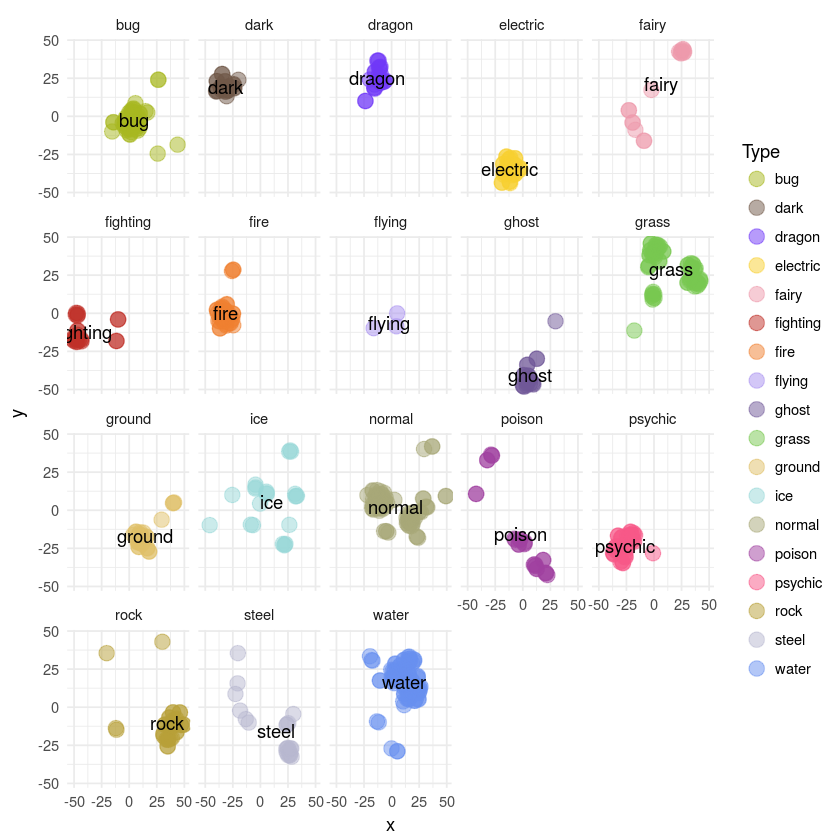

In [7]:
rm(list = ls())
#knitr::opts_chunk$set(message = FALSE, warning = FALSE, fig.width = 12)

library("dplyr")
library("readr")
library("rvest")
library("purrr")
library("stringr")
library("tidyr")
library("highcharter")
library("tsne")
library("ggplot2")
library("htmltools")

path <- function(x) paste0("https://raw.githubusercontent.com/phalt/pokeapi/master/data/v2/csv/", x)

dfpkmn <- read_csv(path("pokemon.csv")) %>% 
  select(-order, -is_default) %>% 
  rename(pokemon = identifier)

dfstat <- read_csv(path("stats.csv")) %>% 
  rename(stat_id = id) %>% 
  right_join(read_csv(path("pokemon_stats.csv")),
             by = "stat_id") %>% 
  mutate(identifier = str_replace(identifier, "-", "_")) %>% 
  select(pokemon_id, identifier, base_stat) %>% 
  spread(identifier, base_stat) %>% 
  rename(id = pokemon_id)

dftype <- read_csv(path("types.csv")) %>% 
  rename(type_id = id) %>% 
  right_join(read_csv(path("pokemon_types.csv")), by = "type_id") %>% 
  select(pokemon_id, identifier, slot) %>% 
  mutate(slot = paste0("type_", slot)) %>% 
  spread(slot, identifier) %>% 
  rename(id = pokemon_id)

dfegg <- read_csv(path("egg_groups.csv")) %>% 
  rename(egg_group_id = id) %>% 
  right_join(read_csv(path("pokemon_egg_groups.csv")), by = "egg_group_id") %>% 
  group_by(species_id) %>% 
  mutate(ranking = row_number(),
         ranking = paste0("egg_group_", ranking)) %>% 
  select(species_id, ranking, identifier) %>% 
  spread(ranking, identifier) 

dfimg <- "https://github.com/phalt/pokeapi/tree/master/data/Pokemon_XY_Sprites" %>% 
  read_html() %>% 
  html_nodes("tr.js-navigation-item > .content > .css-truncate a") %>% 
  map_df(function(x){
    url <- x %>% html_attr("href")
    data_frame(
      id = str_extract(basename(url), "\\d+"),
      url_image = basename(url)
    )
  }) %>%
  mutate(id = as.numeric(id))

url_bulbapedia_list <- "http://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_base_stats_(Generation_VI-present)" 

id <- url_bulbapedia_list %>% 
  read_html(encoding = "UTF-8") %>% 
  html_node("table.sortable") %>% 
  html_table() %>% 
  .[[1]] %>% 
  as.numeric()

url_icon <-  url_bulbapedia_list %>% 
  read_html() %>%
  html_nodes("table.sortable img") %>% 
  html_attr("src")

dficon <- data_frame(id, url_icon) %>% 
  filter(!is.na(id)) %>% 
  distinct(id)

dfcolor <- map_df(na.omit(unique(c(dftype$type_1, dftype$type_2))), function(t){
  # t <- "bug"
  col <- "http://pokemon-uranium.wikia.com/wiki/Template:%s_color" %>% 
    sprintf(t) %>%
    read_html() %>% 
    html_nodes("span > b") %>% 
    html_text()
  data_frame(type = t, color = paste0("#", col))
})

dfcolorf <- expand.grid(color_1 = dfcolor$color, color_2 = dfcolor$color,
                        stringsAsFactors = FALSE) %>% 
  tbl_df() %>% 
  group_by(color_1, color_2) %>% 
  do({
      n = 100;p = 0.25
      data_frame(color_f = colorRampPalette(c(.$color_1, .$color_2))(n)[round(n*p)])
    })

# THE join
df <- dfpkmn %>% 
  left_join(dftype, by = "id") %>% 
  left_join(dfstat, by = "id") %>% 
  left_join(dfcolor %>% rename(type_1 = type, color_1 = color), by = "type_1") %>% 
  left_join(dfcolor %>% rename(type_2 = type, color_2 = color), by = "type_2") %>% 
  left_join(dfcolorf, by =  c("color_1", "color_2")) %>% 
  left_join(dfegg, by = "species_id") %>% 
  left_join(dfimg, by = "id") %>% 
  left_join(dficon, by = "id")

rm(dftype, dfstat, dfcolor, dfcolorf, dfegg, dfimg, dficon)
rm(id, url_bulbapedia_list, url_icon)

#'
#' Finally we remove the pokemon with no images (like the mega ones).
#'
df <- df %>% 
  mutate(color_f = ifelse(is.na(color_f), color_1, color_f)) %>% 
  filter(!is.na(url_image)) 

head(df)

dstype <- df %>% 
  count(type_1, color_1) %>% 
  ungroup() %>% 
  arrange(desc(n)) %>% 
  mutate(x = row_number()) %>% 
  rename(name = type_1,
         color = color_1,
         y = n) %>% 
  select(y, name, color) %>% 
  list.parse3()
  
hcbar <- highchart() %>% 
  hc_xAxis(categories = unlist(pluck(dstype, i = 2))) %>% 
  hc_yAxis(title = NULL) %>% 
  hc_add_series(data = dstype, type = "bar", showInLegend = FALSE,
                name = "Number of species")

hcbar

#+fig.keep='none'
set.seed(3514)

tm <- df %>% 
  mutate(type_2 = ifelse(is.na(type_2), paste("only", type_1), type_2),
         type_1 = type_1) %>% 
  group_by(type_1, type_2) %>%
  summarise(n = n()) %>% 
  ungroup() %>% 
  treemap::treemap(index = c("type_1", "type_2"),
                   vSize = "n", vColor = "type_1")

#'
#' Now let's tweak the treemap result to include the respective color 
#' to each type so we have a more *fun* chart.
#' 

tm$tm <- tm$tm %>%
  tbl_df() %>% 
  left_join(df %>% select(type_1, type_2, color_f) %>% distinct(), by = c("type_1", "type_2")) %>%
  left_join(df %>% select(type_1, color_1) %>% distinct(), by = c("type_1")) %>% 
  mutate(type_1 = paste0("Main ", type_1),
         color = ifelse(is.na(color_f), color_1, color_f))

hctm <- highchart() %>% 
  hc_add_series_treemap(tm, allowDrillToNode = TRUE,
                        layoutAlgorithm = "squarified")

hctm

#' ## A Wild t-SNE Appears! 

set.seed(13242)

tsne_poke <- df %>% 
  select(type_1, type_2, weight, height, base_experience,
         attack, defense, special_attack, special_defense, speed, base_experience,
         hp, egg_group_1, egg_group_2) %>%
  map(function(x){
    ifelse(is.na(x), "NA", x)
  }) %>% 
  as.data.frame() %>% 
  tbl_df() %>% 
  model.matrix(~., data = .) %>% 
  as.data.frame() %>% 
  tbl_df() %>% 
  .[-1] %>% 
  tsne(perplexity = 60)

df <- df %>% 
  mutate(x = tsne_poke[, 1],
         y = tsne_poke[, 2])

dfcenters <- df %>% 
  group_by(type_1, color_1) %>% 
  summarise(cx = mean(x),
            cy = mean(y),
            sdcx = sd(x),
            sdcy = sd(y))

#' 
#' Now, we'll use ggplot to how the algorithm put every pokemon in this
#' new dimensions:
#' 

cols <- df %>% select(type_1, color_1) %>% distinct() %>% {  setNames(.$color_1, .$type_1) }

gg <- ggplot(df) + 
  geom_point(aes(x, y, color = type_1), size = 4, alpha = 0.5) +
  scale_color_manual("Type", values = cols) +
  geom_text(data = dfcenters, aes(cx, cy, label = type_1)) +
  theme_minimal() +
  theme(legend.position = "right") +
  facet_wrap(~type_1)

gg

#' 
#' Clearly the algorithm grouped pokemon according to their main type. Every
#' group look relative concentrated except the *dragon*, *fairy*, *poison* and
#' *steel*. I think this can be beacuse this types of pokemon have a second and
#' variable so they dont are so similiar among them.

ds <- df %>% 
  select(pokemon, type_1, type_2, weight, height,
         attack, defense, special_attack, special_defense,
         url_image, url_icon, color = color_1, x, y) %>% 
  list.parse3() %>% 
  map(function(x){
    x$marker$symbol <- sprintf("url(%s)", x$url_icon)
    x$marker$radius <- 2
    x$url_icon  <- NULL
    x
  })

ds2 <- df %>% 
  select(color = color_1, x, y) %>%
  mutate(color = hex_to_rgba(color, 0.05)) %>% 
  list.parse3()

urlimage <- "https://raw.githubusercontent.com/phalt/pokeapi/master/data/Pokemon_XY_Sprites/"

tooltip <- c("pokemon", "type_1", "type_2",
             "weight", "height",
             "attack",  "defense",
             "special_attack", "special_defense") %>%
  map(function(x){
    tags$tr(
      tags$th(str_replace_all(str_to_title(x), "_", " ")),
      tags$td(paste0("{point.", x, "}"))
    )
  }) %>% 
  do.call(tagList, .) %>% 
  tagList(
    tags$img(src = paste0(urlimage, "{point.url_image}"),
             width = "125px", height = "125px")
  ) %>% 
  as.character()

hctsne <- highchart() %>% 
  hc_chart(zoomType = "xy") %>% 
  hc_xAxis(minRange = diff(range(df$x))/5) %>%
  hc_yAxis(minRange = diff(range(df$y))/5) %>%
  hc_add_series(data = ds,
                type = "scatter",
                name = "pokemons",
                states = list(hover = list(halo = list(
                  size  = 50,
                  attributes = list(
                    opacity = 1)
                )))) %>%
  hc_add_series(data = ds2, type = "scatter",
                marker = list(radius = 75, symbol = "circle"),
                zIndex = -3,  enableMouseTracking = FALSE,
                linkedTo = ":previous") %>%
  hc_plotOptions(series = list()) %>%  
  hc_tooltip(
    useHTML = TRUE,
    borderRadius = 0,
    borderWidth = 5,
    headerFormat = "<table>",
    pointFormat = tooltip,
    footerFormat = "</table>"
  ) %>% 
  hc_add_theme(
    hc_theme_null(
      chart = list(
        backgroundColor = "transparent",
        style = list(
          fontFamily = "Roboto"
          )
        )
      )
    )

hctsne

#' 
#' I see nice things here:
#' 
#' - The cluster are determined by the type of pokemon.
#' - The algorithm keep the chain evolution side by side. You can see
#' charmander, charmeleon, charizard together.
#' - Put steelix, onix and wailord (the most heavy pokemons) together.
#' 

#+echo=FALSE, eval=FALSE
# saveRDS(hctmpkmn <- hctm, file = "~/hctmpkmn.rds", compress = "xz")
# save(hctmpkmn, hcbar, hctsne, file = "~/hcpkmn.RData")